In [ ]:
import pandas as pd
from filters import filter_time, filter_activity, filter_name, filter_distance
from plotting_functions import print_summary, plot_nbr_activities
from summing_functions import *

/var/folders/06/cs4mqzls4js9x3mx4s93n7j80000gn/T/ipykernel_40591/4113498543.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
file_name = 'Activities-25-05-04.csv'
activities = pd.read_csv(file_name)
activities[:3]

,Aktivitetstyp,Datum,Favorit,Namn,Distans,Kalorier,Tid,Medelpuls,Maxpuls,Medelcykelkadens,...,Maximal andningshastighet,Stressändring,Start för stress,Slut för stress,Medestress,Maxbelastning,Färdtid,Total tid,Min. höjd,Max. höjd
0,Styrketräning,2025-05-04 10:02:48,False,Gym,0.00,307,00:54:50,100,133,--,...,--,--,--,--,--,--,00:00:00,00:54:50,--,--
1,Löpning,2025-05-03 13:00:02,False,Lundaloppet,10.24,636,00:39:46,172,180,178,...,--,--,--,--,--,--,00:39:37,00:39:46,33,72
2,Styrketräning,2025-05-01 10:37:18,False,Gym,0.00,369,00:57:21,108,141,--,...,--,--,--,--,--,--,00:00:00,00:57:21,--,--


In [29]:
print("Summary of activities all time:")
print_summary(activities)

Summary of activities all time:
Time: 899.14 hours
Distance: 10076.67 km
Sessions: 828
Average heart rate: 127.07888349514563 bpm
Max heart rate: 189 bpm


In [10]:
print("Summary of activities in 2025:")
print_summary(filter_time(activities, start='2025-01-01'))

Summary of activities in 2025:
Time: 139.92 hours
Distance: 779.56 km
Sessions: 129
Average heart rate: 124.68217054263566 bpm
Max heart rate: 188 bpm


In [5]:
activities_from_2024 = filter_time(activities, start='2024-01-01')

print('Summary of spinning in 2024:')
print_summary(filter_activity(activities_from_2024, 'Inomhuscykling'))

Summary of spinning in 2024:
Time: 46.41 hours
Distance: 1349.42 km
Sessions: 33
Max heart rate: 182 bpm


In [6]:
print('Summary of spinning ever:')
print_summary(filter_activity(activities, 'Inomhuscykling'))

Summary of spinning ever:
Time: 67.02 hours
Distance: 1399.62 km
Sessions: 54
Max heart rate: 183 bpm


In [7]:
print('Summary of cykling ever:')
print_summary(filter_activity(activities, 'Cykling'))

Summary of cykling ever:
Time: 103.33 hours
Distance: 2561.63 km
Sessions: 58
Max heart rate: 171 bpm


In [11]:
print('Summary of running ever:')
print_summary(filter_activity(activities, 'Löpning'))
#import matplotlib.pyplot as plt
#print(filter_activity(activities, 'Löpning')['Medeltempo'])
#plt.plot([int(time.split(':')[0]) + int(time.split(':')[1]) / 60 for time in filter_activity(activities, 'Löpning')['Medeltempo']])

Summary of running ever:
Time: 133.12 hours
Distance: 1352.12 km
Sessions: 143
Max heart rate: 189 bpm


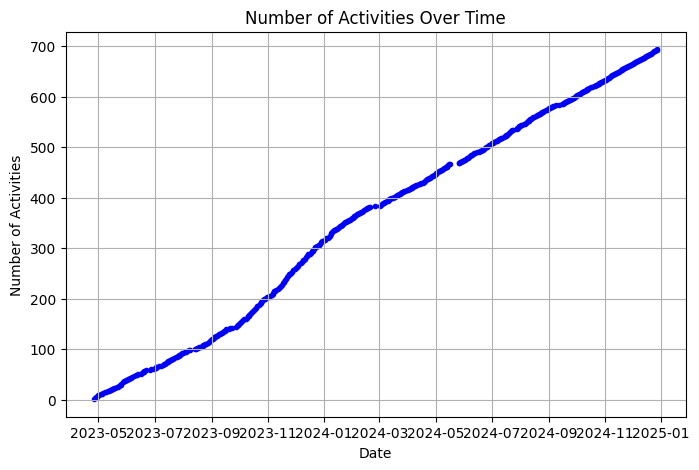

In [12]:
plot_nbr_activities(activities)

In [13]:
print_summary(filter_name(activities, 'rullskidor'))
print('')
print_summary(filter_name(activities, 'Längd'))

Time: 61.1 hours
Distance: 580.77 km
Sessions: 36
Max heart rate: 169 bpm

Time: 18.23 hours
Distance: 120.52 km
Sessions: 12
Max heart rate: 164 bpm


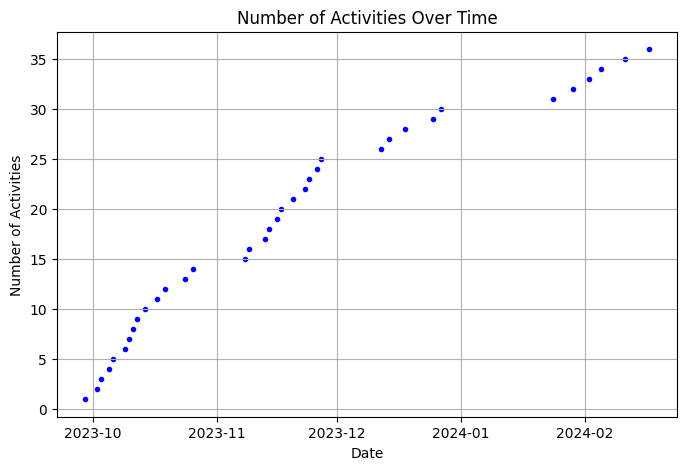

In [14]:
plot_nbr_activities(filter_name(activities, 'rullskidor'))

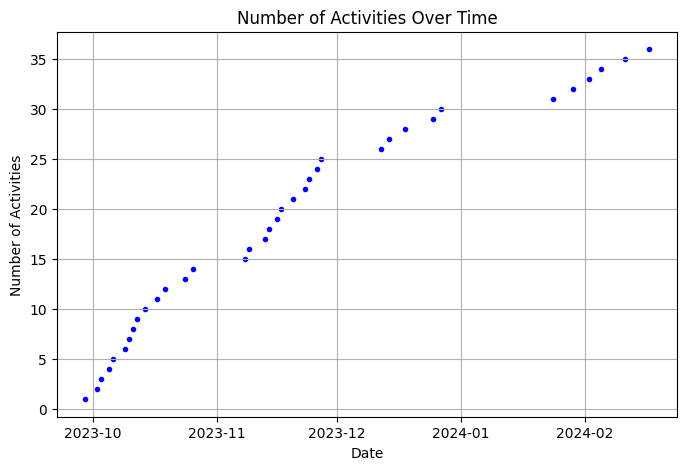

In [15]:
plot_nbr_activities(filter_name(activities, 'rullskidor'))

In [ ]:
# Stats latest 6 months
half_year_activities = filter_time(activities, start='2024-08-01')
print_summary(half_year_activities)

Time: 233.88 hours
Distance: 1067.07 km
Sessions: 228
Average heart rate: 123.04824561403508 bpm
Max heart rate: 187 bpm


In [9]:
# Average hr for 10+km running last 6 months
half_year_activities = filter_time(activities, start='2024-08-01')
running_activities = filter_activity(half_year_activities, "Löpning")
activities_over_10k = filter_distance(running_activities, min_distance=10)
avg_heart_rate(activities_over_10k)

144.21052631578948

In [15]:
# Stats february
feb_activities = filter_time(activities, start='2025-02-01', end='2025-02-28')
print("total")
print_summary(feb_activities)
running_activities = filter_activity(feb_activities, 'Löpning')
print("löpning")
print_summary(running_activities)
cc_activities = filter_activity(feb_activities, 'Konditionspass')
print("cardiocross")
print_summary(cc_activities)
gym_activities = filter_activity(feb_activities, 'Styrketräning')
print("gym")
print_summary(gym_activities)

total
Time: 26.76 hours
Distance: 88.31 km
Sessions: 29
Average heart rate: 129.0344827586207 bpm
Max heart rate: 187 bpm
löpning
Time: 7.93 hours
Distance: 82.99 km
Sessions: 11
Average heart rate: 140.45454545454547 bpm
Max heart rate: 187 bpm
cardiocross
Time: 5.01 hours
Distance: 0 km
Sessions: 5
Average heart rate: 135.6 bpm
Max heart rate: 183 bpm
gym
Time: 12.31 hours
Distance: 0 km
Sessions: 12
Average heart rate: 118.0 bpm
Max heart rate: 174 bpm


In [3]:
running_activities = filter_activity(activities, 'Löpning')
attempts_10k = filter_distance(running_activities, min_distance=10, max_distance=10.5)

print_summary(attempts_10k)

Time: 24.3 hours
Distance: 283.67 km
Sessions: 28
Average heart rate: 150.07142857142858 bpm
Max heart rate: 187 bpm
